## matplotlib를 사용하여 데이터 시각화 실습

이 미션은 파이썬의 데이터 시각화 라이브러리인 matplotlib를 사용하여 데이터를 시각화하는 방법을 배우는 것입니다. 데이터는 제공된 샘플 데이터셋을 사용하며, 다양한 시각화 기법을 적용하여 데이터를 분석하고 이해합니다. 이를 통해 데이터 시각화의 중요성을 이해하고, 실무에서 데이터를 효과적으로 표현하는 능력을 기릅니다. 이 미션에서는 막대 그래프, 선 그래프, 산점도, 히스토그램 등의 기본적인 그래프를 생성하고, 이를 통해 데이터의 패턴과 추세를 파악하는 것을 목표로 합니다.

## 데이터 분석 보고서 바로가기
https://zenith-brochure-bfa.notion.site/matplotlib-21ea86460acf42d49f74d133786d0390?pvs=4

####
#### 필요한 라이브러리(matplotlib, pandas)를 설치하고, Python 환경을 설정합니다. ✅

#####

In [371]:
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# !pip install ruamel-yaml
# !pip install ydata-profiling

In [372]:
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [373]:
!python --version

Python 3.12.4


####
#### 제공된 CSV 파일을 pandas를 사용하여 불러오고, 데이터프레임으로 변환합니다. ✅
#####

In [375]:
%cd 1month/

[Errno 2] No such file or directory: '1month/'
/Users/abby/kakaotech_bootcamp/Private Mission


In [376]:
%ls

0802TEST.ipynb                          chatGPT_method.py
Airbnb_Open_Data.csv                    mission1_MatplotlibVisualization.ipynb
basic_environment_test.py               test.py


In [377]:
raw_data = pd.read_csv('Airbnb_Open_Data.csv',low_memory=False)

In [378]:
raw_data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [379]:
raw_data['country code'].unique()

array(['US', nan], dtype=object)

In [380]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

####
#### 데이터의 기초 통계를 확인하고, 결측값이나 이상치를 처리합니다. ✅
#####

In [382]:
raw_data.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [383]:
# profile = ProfileReport(raw_data, title='Report')
# profile.to_file("report.html")

In [384]:
# 결측치 확인
raw_data.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [385]:
# 결측치가 많은 컬럼 제거
del_col = raw_data.drop(['license','house_rules','reviews per month','last review','country','country code'], axis=1)

In [386]:
# 결측치 재확인
del_col.isnull().sum()

id                                  0
NAME                              250
host id                             0
host_identity_verified            289
host name                         406
neighbourhood group                29
neighbourhood                      16
lat                                 8
long                                8
instant_bookable                  105
cancellation_policy                76
room type                           0
Construction year                 214
price                             247
service fee                       273
minimum nights                    409
number of reviews                 183
review rate number                326
calculated host listings count    319
availability 365                  448
dtype: int64

In [387]:
del_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   instant_bookable                102494 non-null  object 
 10  cancellation_policy             102523 non-null  object 
 11  room type                       102599 non-null  object 
 12  Construction yea

In [388]:
# 결측치 전부 제거 (총 데이터의 약 3% 제거)
ndata = del_col.dropna()
ndata

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,$966,$193,10.0,9.0,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,True,flexible,Entire home/apt,2013.0,$577,$115,3.0,74.0,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,False,moderate,Private room,2009.0,"$1,060",$212,45.0,49.0,5.0,1.0,219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,3.0,1.0,227.0
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,2.0,2.0,395.0
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,5.0,1.0,342.0
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,3.0,1.0,386.0


In [389]:
# 제거된 인덱스로 인해 불규칙해진 인덱스 넘버를 데이터 수에 맞게 재생성
ndata = ndata.reset_index(drop=True)
ndata

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,$966,$193,10.0,9.0,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,4.0,2.0,228.0
2,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,3.0,1.0,289.0
3,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,True,flexible,Entire home/apt,2013.0,$577,$115,3.0,74.0,3.0,1.0,374.0
4,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,False,moderate,Private room,2009.0,"$1,060",$212,45.0,49.0,5.0,1.0,219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99497,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,3.0,1.0,227.0
99498,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,2.0,2.0,395.0
99499,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,5.0,1.0,342.0
99500,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,3.0,1.0,386.0


In [390]:
# 데이터 최종 확인 및 결측치 없는지 확인
print(ndata.head())
print('-'*80)
print(ndata.info())

        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   
3  1004098         Large Cozy 1 BR Apartment In Midtown East  45498551794   
4  1005202                                   BlissArtsSpace!  90821839709   

  host_identity_verified host name neighbourhood group       neighbourhood  \
0            unconfirmed  Madaline            Brooklyn          Kensington   
1               verified     Jenna           Manhattan             Midtown   
2               verified    Lyndon           Manhattan         East Harlem   
3               verified  Michelle           Manhattan         Murray Hill   
4            unconfirmed      Emma            Brooklyn  Bedford-Stuyvesant   

        lat      long instant_bookable cancellation_policy        ro

####
#### 막대 그래프를 생성하여 범주형 데이터의 분포를 시각화합니다. ✅
#####

In [392]:
# 데이터 하나에서 'brookln'으로 오타가 있어서 'Brooklyn'으로 통일되도록 변경

ndata.loc[ndata['neighbourhood group'] == 'brookln','neighbourhood group'] = 'Brooklyn'

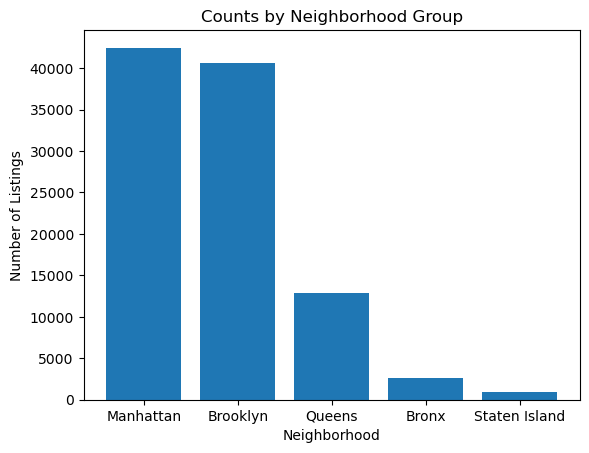

In [393]:
group = ndata['neighbourhood group']
vc = group.value_counts()

groupIndex = vc.index
groupValue = list(vc)

plt.bar(groupIndex, groupValue)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.title("Counts by Neighborhood Group")
plt.show()

In [394]:
nights_df = ndata[ndata['minimum nights'] > 0]
nights_df = nights_df[nights_df['minimum nights'] < 50]
nights_df = nights_df.reset_index(drop=True)

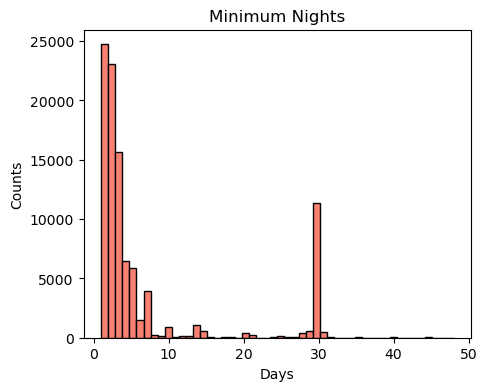

In [395]:
plt.figure(figsize=(5,4))
plt.hist(nights_df['minimum nights'], bins=50, color='salmon', edgecolor='black')
# plt.xlim([0,150])
plt.title('Minimum Nights')
plt.xlabel('Days')
plt.ylabel('Counts')
plt.show()

In [396]:
# 위 시각화 결과, 단기와 장기 투숙을 나누는 기준을 일주일(7일)로 설정하여 이후 분석을 진행함.
# minimum nights : 1~7 = 단기 / 그 이상은 모두 장기로 분류함.

In [397]:
long_short = []
for i in range(len(nights_df)):
    if nights_df.loc[i,'minimum nights'] <= 7:
        long_short.append(0)
    else :
        long_short.append(1)

nights_df['long short'] = long_short
nights_df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,...,room type,Construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365,long short
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,Private room,2020.0,$966,$193,10.0,9.0,4.0,6.0,286.0,1
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,Entire home/apt,2007.0,$142,$28,30.0,45.0,4.0,2.0,228.0,1
2,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,Entire home/apt,2009.0,$204,$41,10.0,9.0,3.0,1.0,289.0,1
3,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,True,...,Entire home/apt,2013.0,$577,$115,3.0,74.0,3.0,1.0,374.0,0
4,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,False,...,Private room,2009.0,"$1,060",$212,45.0,49.0,5.0,1.0,219.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98477,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,False,...,Private room,2003.0,$844,$169,1.0,0.0,3.0,1.0,227.0,0
98478,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,True,...,Private room,2016.0,$837,$167,1.0,1.0,2.0,2.0,395.0,0
98479,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,True,...,Private room,2009.0,$988,$198,3.0,0.0,5.0,1.0,342.0,0
98480,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,True,...,Entire home/apt,2015.0,$546,$109,2.0,5.0,3.0,1.0,386.0,0


In [398]:
stay_type = ['short','long']
mean_review = [nights_df[nights_df['long short']==0]['number of reviews'].mean(),
               nights_df[nights_df['long short']==1]['number of reviews'].mean()]

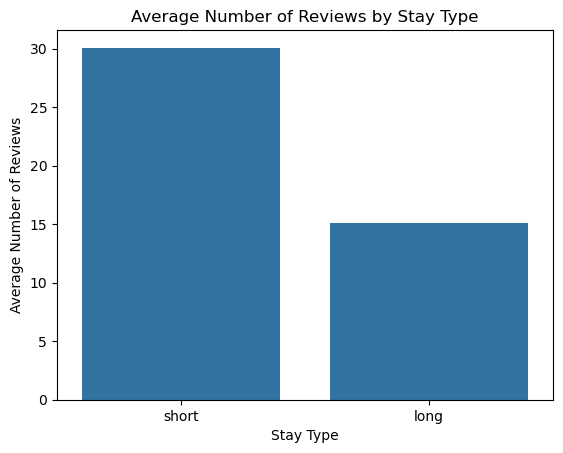

In [399]:
sns.barplot(x=stay_type, y=mean_review)
plt.title('Average Number of Reviews by Stay Type')
plt.ylabel('Average Number of Reviews')
plt.xlabel('Stay Type')
plt.show()

####
#### 선 그래프를 생성하여 시간에 따른 데이터의 변화를 시각화합니다. ✅
#####

In [401]:
# 연도별 건축물 숫자 구하기

# 건축년도의 데이터 타입을 float -> int 로 변환
ndata['Construction year'] = ndata['Construction year'].astype(int)

# 건축년도별 건축물 수 합산 구하기
year_vc = ndata['Construction year'].value_counts().sort_index()
yearIndex = year_vc.index
yearValue = year_vc.values

print(yearIndex)
print(yearValue)

Index([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype='int64', name='Construction year')
[4956 4883 5003 5081 4948 5076 5018 5045 4923 4997 4896 5085 4973 4871
 4928 4884 5054 5016 4893 4972]


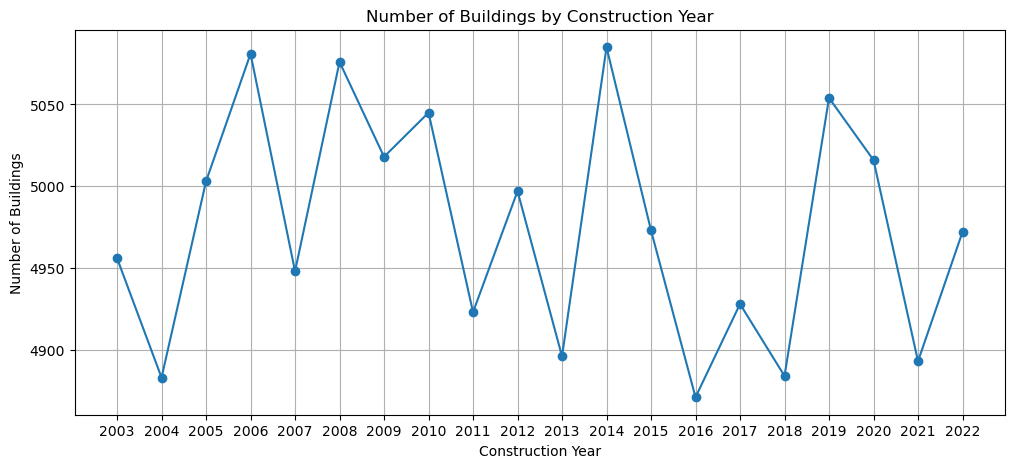

In [402]:
# 그래프 그리기
plt.figure(figsize = (12,5))
plt.plot(yearIndex, yearValue, marker='o')
plt.title('Number of Buildings by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Number of Buildings')
plt.xticks(yearIndex)
plt.grid(True)

####
#### 산점도를 생성하여 두 변수 간의 상관관계를 시각화합니다. ✅
#####

In [404]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99502 entries, 0 to 99501
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              99502 non-null  int64  
 1   NAME                            99502 non-null  object 
 2   host id                         99502 non-null  int64  
 3   host_identity_verified          99502 non-null  object 
 4   host name                       99502 non-null  object 
 5   neighbourhood group             99502 non-null  object 
 6   neighbourhood                   99502 non-null  object 
 7   lat                             99502 non-null  float64
 8   long                            99502 non-null  float64
 9   instant_bookable                99502 non-null  object 
 10  cancellation_policy             99502 non-null  object 
 11  room type                       99502 non-null  object 
 12  Construction year               

In [405]:
# service fee 와 price 변수: object -> int 로 변환
import re
ndata['price'] = ndata['price'].apply(lambda x:re.sub('[^0-9]','',x))
ndata['service fee'] = ndata['service fee'].apply(lambda x:re.sub('[^0-9]','',x))
ndata[['price','service fee']] = ndata[['price','service fee']].astype(int)

In [406]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99502 entries, 0 to 99501
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              99502 non-null  int64  
 1   NAME                            99502 non-null  object 
 2   host id                         99502 non-null  int64  
 3   host_identity_verified          99502 non-null  object 
 4   host name                       99502 non-null  object 
 5   neighbourhood group             99502 non-null  object 
 6   neighbourhood                   99502 non-null  object 
 7   lat                             99502 non-null  float64
 8   long                            99502 non-null  float64
 9   instant_bookable                99502 non-null  object 
 10  cancellation_policy             99502 non-null  object 
 11  room type                       99502 non-null  object 
 12  Construction year               

In [407]:
# 산점도의 변수로 사용하기 위해 리뷰 수가 0인 데이터를 제외하여 스케일링
reviews = ndata[ndata['number of reviews']!=0]
reviews['number of reviews']

0          9.0
1         45.0
2          9.0
3         74.0
4         49.0
         ...  
99491    177.0
99494     17.0
99496      8.0
99498      1.0
99500      5.0
Name: number of reviews, Length: 84331, dtype: float64

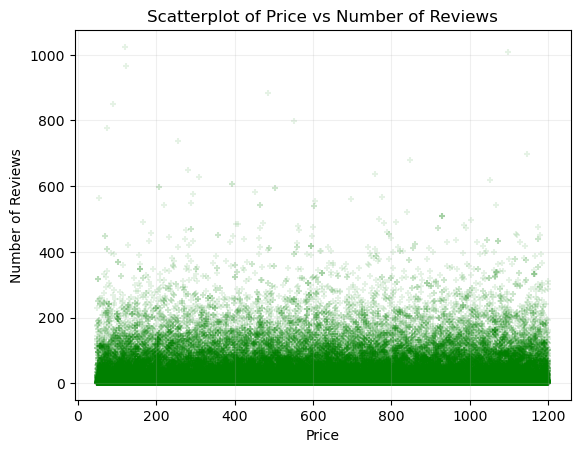

In [408]:
# 다양한 변수들로 시도했으나 산점도 그래프를 그릴 만한 유의미한 상관성을 가지는 변수를 찾기 어려움
plt.scatter(reviews['price'],reviews['number of reviews'],alpha=0.1,s=13,marker='+',c='green')
plt.title('Scatterplot of Price vs Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.grid(True, which='both',ls='-',alpha=0.2)

<Axes: >

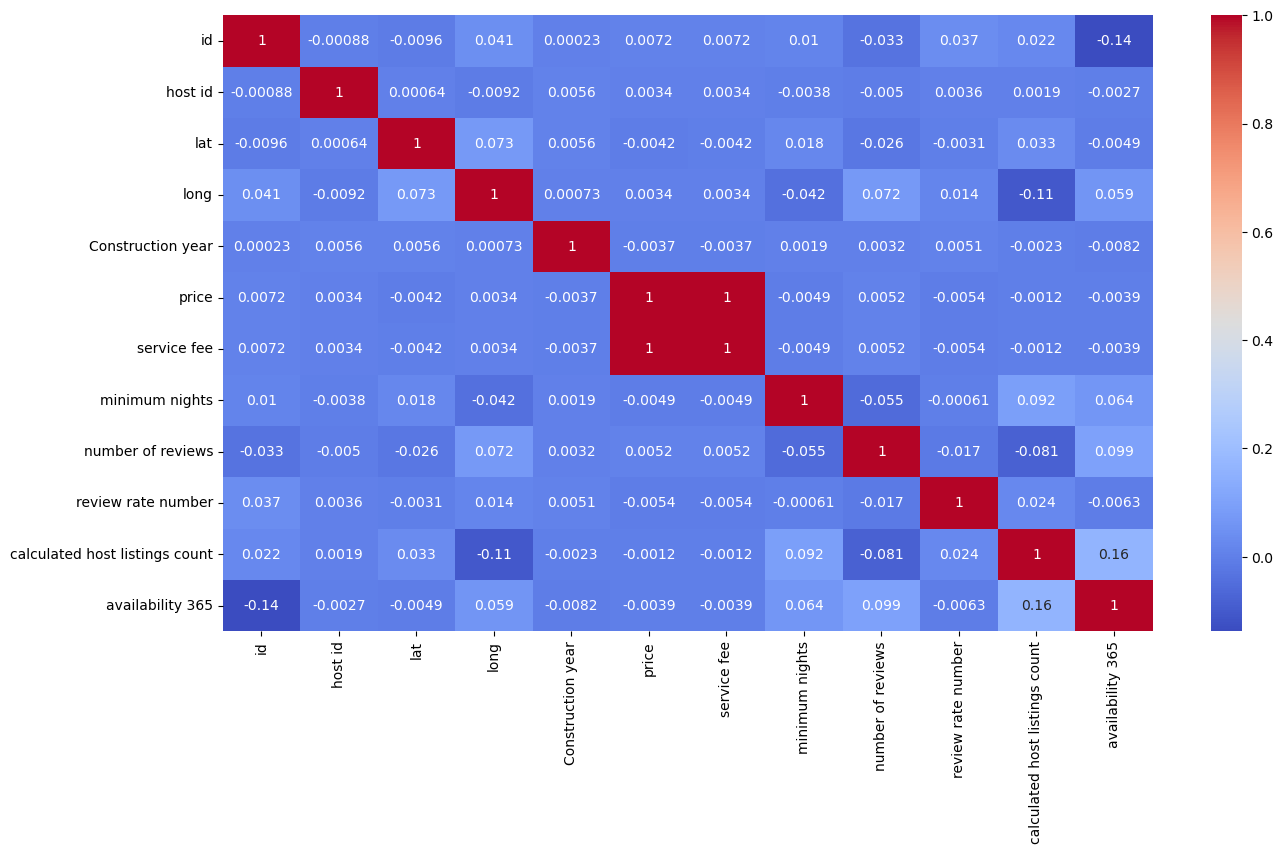

In [409]:
# 수치형 변수들 간의 상관성이 적음을 보여주는 히트맵
numerical = ndata.select_dtypes(include=['int64','float64']).columns
matrix = ndata[numerical].corr()
plt.figure(figsize=(15,8))
sns.heatmap(matrix, annot=True, cmap='coolwarm')

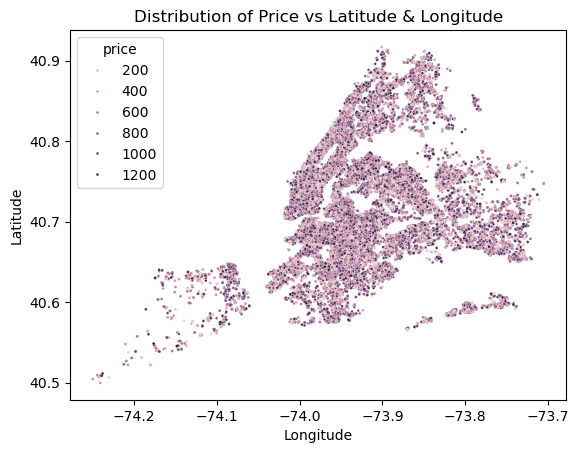

In [410]:
# 위치를 나타내는 위도, 경도를 이용하여 가격의 분포를 산점도로 그려봄
sns.scatterplot(y='lat',x='long',hue='price',data=ndata,s=4)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Distribution of Price vs Latitude & Longitude')
plt.show()

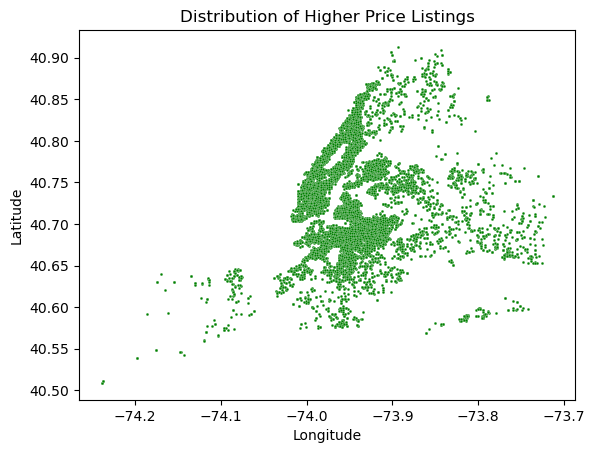

In [483]:
sns.scatterplot(y='lat',x='long',c='green',data=ndata[ndata['price']>=1000],s=4)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Distribution of Higher Price Listings')
plt.show()

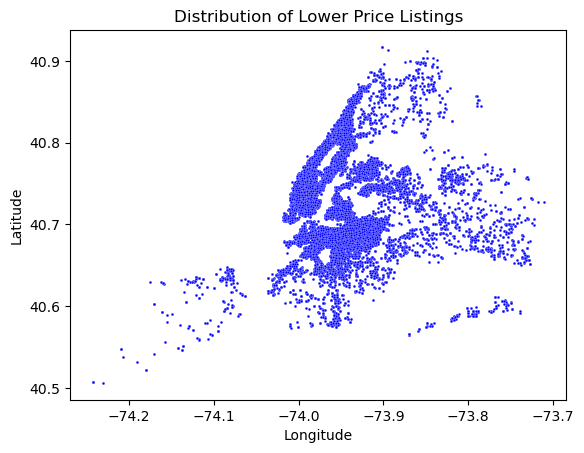

In [481]:
sns.scatterplot(y='lat',x='long',c='blue',data=ndata[ndata['price']<300],s=4)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Distribution of Lower Price Listings')
plt.show()

####
#### 히스토그램을 생성하여 데이터의 분포를 시각화합니다. ✅
#####

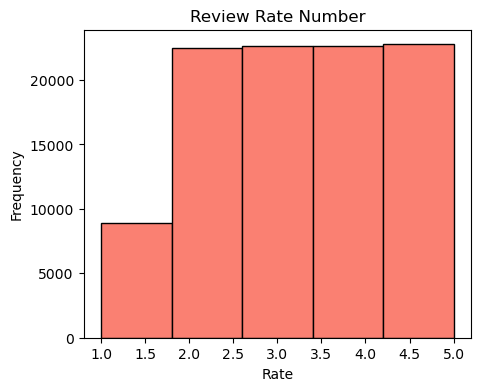

In [414]:
plt.figure(figsize=(5,4))
plt.hist(ndata['review rate number'], bins=5, color='salmon', edgecolor='black')
plt.title('Review Rate Number')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

#### 생성된 각 그래프에 제목, 축 레이블, 범례 등을 추가하여 가독성을 높입니다. ✅

#### 생성된 그래프를 이미지 파일로 저장합니다. ✅

#### 시각화 결과를 분석하고, 데이터에서 발견한 주요 패턴과 인사이트를 보고서로 작성합니다. ✅